<a href="https://colab.research.google.com/github/DataMinati/Super-Notebooks-1K/blob/main/Covid_Vaccines_Stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mpl_dates

In [2]:
url = 'https://raw.githubusercontent.com/MainakRepositor/Datasets-/master/vaccine%20stocks.csv'
df = pd.read_csv(url,error_bad_lines=False)
df.head()

,Ticker,BioNTech,BioNTech.1,BioNTech.2,BioNTech.3,BioNTech.4,BioNTech.5,Moderna,Moderna.1,Moderna.2,Moderna.3,Moderna.4,Moderna.5,Johnson & Johnson,Johnson & Johnson.1,Johnson & Johnson.2,Johnson & Johnson.3,Johnson & Johnson.4,Johnson & Johnson.5,Inovio Pharmaceuticals,Inovio Pharmaceuticals.1,Inovio Pharmaceuticals.2,Inovio Pharmaceuticals.3,Inovio Pharmaceuticals.4,Inovio Pharmaceuticals.5,Sinovac,Sinovac.1,Sinovac.2,Sinovac.3,Sinovac.4,Sinovac.5,Sinopharm,Sinopharm.1,Sinopharm.2,Sinopharm.3,Sinopharm.4,Sinopharm.5,Novavax,Novavax.1,Novavax.2,Novavax.3,Novavax.4,Novavax.5,Astrazeneca,Astrazeneca.1,Astrazeneca.2,Astrazeneca.3,Astrazeneca.4,Astrazeneca.5
0,Stock Info,High,Low,Open,Close,Volume,Adj Close,High,Low,Open,Close,Volume,Adj Close,High,Low,Open,Close,Volume,Adj Close,High,Low,Open,Close,Volume,Adj Close,High,Low,Open,Close,Volume,Adj Close,High,Low,Open,Close,Volume,Adj Close,High,Low,Open,Close,Volume,Adj Close,High,Low,Open,Close,Volume,Adj Close
1,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-10-10,16.698999404907227,13.010000228881836,16.5,14.239999771118164,2805800,14.239999771118164,14.40999984741211,13.869999885559082,14.130000114440918,14.15999984741211,1343300,14.15999984741211,130.1199951171875,128.6300048828125,128.9499969482422,129.05999755859375,5119700.0,122.50959777832031,2.180000066757202,2.059999942779541,2.0799999237060547,2.1600000858306885,423000,2.1600000858306885,6.46999979019165,6.46999979019165,6.46999979019165,6.46999979019165,0,6.46999979019165,3.25,3.25,3.25,3.25,2800.0,3.0424230098724365,4.559999942779541,4.409999847412109,4.460000038146973,4.480000019073486,216900,4.480000019073486,43.79999923706055,43.15999984741211,43.20000076293945,43.599998474121094,6218200.0,41.256011962890625
3,2019-10-11,15.34000015258789,13.5,15.34000015258789,13.819999694824219,1364300,13.819999694824219,14.699999809265137,13.989999771118164,14.239999771118164,14.055000305175781,934900,14.055000305175781,132.6199951171875,130.82000732421875,131.13999938964844,131.3300018310547,7161400.0,124.66439056396484,2.2799999713897705,2.180000066757202,2.180000066757202,2.180000066757202,803300,2.180000066757202,6.46999979019165,6.46999979019165,6.46999979019165,6.46999979019165,0,6.46999979019165,3.25,3.25,3.25,3.25,0.0,3.0424230098724365,4.619999885559082,4.46999979019165,4.539999961853027,4.559999942779541,360400,4.559999942779541,44.15999984741211,43.540000915527344,43.7400016784668,43.58000183105469,3842900.0,41.237091064453125
4,2019-10-14,13.90999984741211,12.524999618530273,13.829999923706055,12.75,899100,12.75,14.270000457763672,13.670000076293945,14.1899995803833,13.930000305175781,954300,13.930000305175781,131.36000061035156,130.4199981689453,131.36000061035156,130.72000122070312,5700000.0,124.0853500366211,2.2100000381469727,2.109999895095825,2.180000066757202,2.130000114440918,286500,2.130000114440918,6.46999979019165,6.46999979019165,6.46999979019165,6.46999979019165,0,6.46999979019165,3.25,3.25,3.25,3.25,0.0,3.0424230098724365,4.880000114440918,4.550000190734863,4.550000190734863,4.690000057220459,371400,4.690000057220459,44.290000915527344,43.81999969482422,43.9900016784668,43.84000015258789,2651700.0,41.48311233520508


In [3]:
r,c = df.shape
print("Number of rows in dataset = ",r)
print("Number of cols in dataset = ",c)

Number of rows in dataset =  480
Number of cols in dataset =  49


In [4]:
print("List of Vaccine Manufacturers")
df.columns

List of Vaccine Manufacturers


Index(['Ticker', 'BioNTech', 'BioNTech.1', 'BioNTech.2', 'BioNTech.3',
       'BioNTech.4', 'BioNTech.5', 'Moderna', 'Moderna.1', 'Moderna.2',
       'Moderna.3', 'Moderna.4', 'Moderna.5', 'Johnson & Johnson',
       'Johnson & Johnson.1', 'Johnson & Johnson.2', 'Johnson & Johnson.3',
       'Johnson & Johnson.4', 'Johnson & Johnson.5', 'Inovio Pharmaceuticals',
       'Inovio Pharmaceuticals.1', 'Inovio Pharmaceuticals.2',
       'Inovio Pharmaceuticals.3', 'Inovio Pharmaceuticals.4',
       'Inovio Pharmaceuticals.5', 'Sinovac', 'Sinovac.1', 'Sinovac.2',
       'Sinovac.3', 'Sinovac.4', 'Sinovac.5', 'Sinopharm', 'Sinopharm.1',
       'Sinopharm.2', 'Sinopharm.3', 'Sinopharm.4', 'Sinopharm.5', 'Novavax',
       'Novavax.1', 'Novavax.2', 'Novavax.3', 'Novavax.4', 'Novavax.5',
       'Astrazeneca', 'Astrazeneca.1', 'Astrazeneca.2', 'Astrazeneca.3',
       'Astrazeneca.4', 'Astrazeneca.5'],
      dtype='object')

In [6]:
#BioNTech
df_biontech = df.drop(columns = ['Moderna', 'Moderna.1', 'Moderna.2',
       'Moderna.3', 'Moderna.4', 'Moderna.5', 'Johnson & Johnson',
       'Johnson & Johnson.1', 'Johnson & Johnson.2', 'Johnson & Johnson.3',
       'Johnson & Johnson.4', 'Johnson & Johnson.5', 'Inovio Pharmaceuticals',
       'Inovio Pharmaceuticals.1', 'Inovio Pharmaceuticals.2',
       'Inovio Pharmaceuticals.3', 'Inovio Pharmaceuticals.4',
       'Inovio Pharmaceuticals.5', 'Sinovac', 'Sinovac.1', 'Sinovac.2',
       'Sinovac.3', 'Sinovac.4', 'Sinovac.5', 'Sinopharm', 'Sinopharm.1',
       'Sinopharm.2', 'Sinopharm.3', 'Sinopharm.4', 'Sinopharm.5', 'Novavax',
       'Novavax.1', 'Novavax.2', 'Novavax.3', 'Novavax.4', 'Novavax.5',
       'Astrazeneca', 'Astrazeneca.1', 'Astrazeneca.2', 'Astrazeneca.3',
       'Astrazeneca.4', 'Astrazeneca.5'])

df_biontech = df_biontech.rename(columns={"Ticker":"Date","BioNTech":"High", "BioNTech.1":"Low", "BioNTech.2":"Open", "BioNTech.3":"Close","BioNTech.4":"Volume"})
df_biontech = df_biontech.drop(columns=['BioNTech.5'])
df_biontech = df_biontech.drop(index=[0,1])


In [7]:
df_biontech.head()

,Date,High,Low,Open,Close,Volume
2,2019-10-10,16.698999404907227,13.010000228881836,16.5,14.239999771118164,2805800
3,2019-10-11,15.34000015258789,13.5,15.34000015258789,13.819999694824219,1364300
4,2019-10-14,13.90999984741211,12.524999618530273,13.829999923706055,12.75,899100
5,2019-10-15,13.0,12.529999732971191,12.989999771118164,12.920000076293945,484700
6,2019-10-16,13.880000114440918,12.609999656677246,13.199999809265137,12.9399995803833,524200


In [8]:
#Moderna
df_moderna = df.drop(columns = ['BioNTech', 'BioNTech.1', 'BioNTech.2', 'BioNTech.3',
       'BioNTech.4', 'BioNTech.5', 'Johnson & Johnson',
       'Johnson & Johnson.1', 'Johnson & Johnson.2', 'Johnson & Johnson.3',
       'Johnson & Johnson.4', 'Johnson & Johnson.5', 'Inovio Pharmaceuticals',
       'Inovio Pharmaceuticals.1', 'Inovio Pharmaceuticals.2',
       'Inovio Pharmaceuticals.3', 'Inovio Pharmaceuticals.4',
       'Inovio Pharmaceuticals.5', 'Sinovac', 'Sinovac.1', 'Sinovac.2',
       'Sinovac.3', 'Sinovac.4', 'Sinovac.5', 'Sinopharm', 'Sinopharm.1',
       'Sinopharm.2', 'Sinopharm.3', 'Sinopharm.4', 'Sinopharm.5', 'Novavax',
       'Novavax.1', 'Novavax.2', 'Novavax.3', 'Novavax.4', 'Novavax.5',
       'Astrazeneca', 'Astrazeneca.1', 'Astrazeneca.2', 'Astrazeneca.3',
       'Astrazeneca.4', 'Astrazeneca.5'])

df_moderna = df_moderna.rename(columns={"Ticker":"Date","Moderna":"High", "Moderna.1":"Low", "Moderna.2":"Open", "Moderna.3":"Close","Moderna.4":"Volume"})
df_moderna = df_moderna.drop(columns=['Moderna.5'])
df_moderna = df_moderna.drop(index=[0,1])
df_moderna.head()

,Date,High,Low,Open,Close,Volume
2,2019-10-10,14.40999984741211,13.869999885559082,14.130000114440918,14.15999984741211,1343300
3,2019-10-11,14.699999809265137,13.989999771118164,14.239999771118164,14.055000305175781,934900
4,2019-10-14,14.270000457763672,13.670000076293945,14.1899995803833,13.930000305175781,954300
5,2019-10-15,14.449999809265137,13.529999732971191,13.930000305175781,14.329999923706055,1153500
6,2019-10-16,14.319999694824219,14.020000457763672,14.270000457763672,14.149999618530273,914100


In [9]:
#Johnson & Johnson
df_jj = df.drop(columns = ['BioNTech', 'BioNTech.1', 'BioNTech.2', 'BioNTech.3',
       'BioNTech.4', 'BioNTech.5', 'Moderna', 'Moderna.1', 'Moderna.2',
       'Moderna.3', 'Moderna.4', 'Moderna.5', 'Inovio Pharmaceuticals',
       'Inovio Pharmaceuticals.1', 'Inovio Pharmaceuticals.2',
       'Inovio Pharmaceuticals.3', 'Inovio Pharmaceuticals.4',
       'Inovio Pharmaceuticals.5', 'Sinovac', 'Sinovac.1', 'Sinovac.2',
       'Sinovac.3', 'Sinovac.4', 'Sinovac.5', 'Sinopharm', 'Sinopharm.1',
       'Sinopharm.2', 'Sinopharm.3', 'Sinopharm.4', 'Sinopharm.5', 'Novavax',
       'Novavax.1', 'Novavax.2', 'Novavax.3', 'Novavax.4', 'Novavax.5',
       'Astrazeneca', 'Astrazeneca.1', 'Astrazeneca.2', 'Astrazeneca.3',
       'Astrazeneca.4', 'Astrazeneca.5'])

df_jj = df_jj.rename(columns={"Ticker":"Date","Johnson & Johnson":"High", "Johnson & Johnson.1":"Low", "Johnson & Johnson.2":"Open", "Johnson & Johnson.3":"Close","Johnson & Johnson.4":"Volume"})
df_jj = df_jj.drop(columns=['Johnson & Johnson.5'])
df_jj = df_jj.drop(index=[0,1])
df_jj.head()

,Date,High,Low,Open,Close,Volume
2,2019-10-10,130.1199951171875,128.6300048828125,128.9499969482422,129.05999755859375,5119700.0
3,2019-10-11,132.6199951171875,130.82000732421875,131.13999938964844,131.3300018310547,7161400.0
4,2019-10-14,131.36000061035156,130.4199981689453,131.36000061035156,130.72000122070312,5700000.0
5,2019-10-15,134.25,132.10000610351562,133.0,132.83999633789062,10008800.0
6,2019-10-16,136.58999633789062,133.8000030517578,134.89999389648438,135.1699981689453,12434200.0


In [10]:
#Inovio Pharmaceuticals
df_ip = df.drop(columns = ['BioNTech', 'BioNTech.1', 'BioNTech.2', 'BioNTech.3',
       'BioNTech.4', 'BioNTech.5', 'Moderna', 'Moderna.1', 'Moderna.2',
       'Moderna.3', 'Moderna.4', 'Moderna.5', 'Johnson & Johnson', 'Johnson & Johnson.1', 'Johnson & Johnson.2', 'Johnson & Johnson.3',
       'Johnson & Johnson.4', 'Johnson & Johnson.5', 'Sinovac', 'Sinovac.1', 'Sinovac.2',
       'Sinovac.3', 'Sinovac.4', 'Sinovac.5', 'Sinopharm', 'Sinopharm.1',
       'Sinopharm.2', 'Sinopharm.3', 'Sinopharm.4', 'Sinopharm.5', 'Novavax',
       'Novavax.1', 'Novavax.2', 'Novavax.3', 'Novavax.4', 'Novavax.5',
       'Astrazeneca', 'Astrazeneca.1', 'Astrazeneca.2', 'Astrazeneca.3',
       'Astrazeneca.4', 'Astrazeneca.5'])

df_ip = df_ip.rename(columns={"Ticker":"Date","Inovio Pharmaceuticals":"High", "Inovio Pharmaceuticals.1":"Low", "Inovio Pharmaceuticals.2":"Open", "Inovio Pharmaceuticals.3":"Close","Inovio Pharmaceuticals.4":"Volume"})
df_ip = df_ip.drop(columns=['Inovio Pharmaceuticals.5'])
df_ip = df_ip.drop(index=[0,1])
df_ip.head()

,Date,High,Low,Open,Close,Volume
2,2019-10-10,2.180000066757202,2.059999942779541,2.0799999237060547,2.1600000858306885,423000
3,2019-10-11,2.2799999713897705,2.180000066757202,2.180000066757202,2.180000066757202,803300
4,2019-10-14,2.2100000381469727,2.109999895095825,2.180000066757202,2.130000114440918,286500
5,2019-10-15,2.25,2.119999885559082,2.119999885559082,2.240000009536743,530800
6,2019-10-16,2.549999952316284,2.2300000190734863,2.240000009536743,2.509999990463257,998400


In [11]:
#Sinovac
df_sinovac = df.drop(columns = ['BioNTech', 'BioNTech.1', 'BioNTech.2', 'BioNTech.3',
       'BioNTech.4', 'BioNTech.5', 'Moderna', 'Moderna.1', 'Moderna.2',
       'Moderna.3', 'Moderna.4', 'Moderna.5', 'Johnson & Johnson', 'Johnson & Johnson.1', 'Johnson & Johnson.2', 'Johnson & Johnson.3',
       'Johnson & Johnson.4', 'Johnson & Johnson.5', 'Inovio Pharmaceuticals',
       'Inovio Pharmaceuticals.1', 'Inovio Pharmaceuticals.2',
       'Inovio Pharmaceuticals.3', 'Inovio Pharmaceuticals.4',
       'Inovio Pharmaceuticals.5', 'Sinopharm', 'Sinopharm.1',
       'Sinopharm.2', 'Sinopharm.3', 'Sinopharm.4', 'Sinopharm.5', 'Novavax',
       'Novavax.1', 'Novavax.2', 'Novavax.3', 'Novavax.4', 'Novavax.5',
       'Astrazeneca', 'Astrazeneca.1', 'Astrazeneca.2', 'Astrazeneca.3',
       'Astrazeneca.4', 'Astrazeneca.5'])

df_sinovac = df_sinovac.rename(columns={"Ticker":"Date","Sinovac":"High", "Sinovac.1":"Low", "Sinovac.2":"Open", "Sinovac.3":"Close","Sinovac.4":"Volume"})
df_sinovac = df_sinovac.drop(columns=['Sinovac.5'])
df_sinovac = df_sinovac.drop(index=[0,1])
df_sinovac.head()

,Date,High,Low,Open,Close,Volume
2,2019-10-10,6.46999979019165,6.46999979019165,6.46999979019165,6.46999979019165,0
3,2019-10-11,6.46999979019165,6.46999979019165,6.46999979019165,6.46999979019165,0
4,2019-10-14,6.46999979019165,6.46999979019165,6.46999979019165,6.46999979019165,0
5,2019-10-15,6.46999979019165,6.46999979019165,6.46999979019165,6.46999979019165,0
6,2019-10-16,6.46999979019165,6.46999979019165,6.46999979019165,6.46999979019165,0


In [12]:
#Sinopharm
df_sinopharm = df.drop(columns = ['BioNTech', 'BioNTech.1', 'BioNTech.2', 'BioNTech.3',
       'BioNTech.4', 'BioNTech.5', 'Moderna', 'Moderna.1', 'Moderna.2',
       'Moderna.3', 'Moderna.4', 'Moderna.5', 'Johnson & Johnson', 'Johnson & Johnson.1', 'Johnson & Johnson.2', 'Johnson & Johnson.3',
       'Johnson & Johnson.4', 'Johnson & Johnson.5', 'Inovio Pharmaceuticals',
       'Inovio Pharmaceuticals.1', 'Inovio Pharmaceuticals.2',
       'Inovio Pharmaceuticals.3', 'Inovio Pharmaceuticals.4',
       'Inovio Pharmaceuticals.5', 'Sinovac', 'Sinovac.1', 'Sinovac.2',
       'Sinovac.3', 'Sinovac.4', 'Sinovac.5', 'Novavax',
       'Novavax.1', 'Novavax.2', 'Novavax.3', 'Novavax.4', 'Novavax.5',
       'Astrazeneca', 'Astrazeneca.1', 'Astrazeneca.2', 'Astrazeneca.3',
       'Astrazeneca.4', 'Astrazeneca.5'])

df_sinopharm = df_sinopharm.rename(columns={"Ticker":"Date","Sinopharm":"High", "Sinopharm.1":"Low", "Sinopharm.2":"Open", "Sinopharm.3":"Close","Sinopharm.4":"Volume"})
df_sinopharm = df_sinopharm.drop(columns=['Sinopharm.5'])
df_sinopharm = df_sinopharm.drop(index=[0,1])
df_sinopharm.head()

,Date,High,Low,Open,Close,Volume
2,2019-10-10,3.25,3.25,3.25,3.25,2800.0
3,2019-10-11,3.25,3.25,3.25,3.25,0.0
4,2019-10-14,3.25,3.25,3.25,3.25,0.0
5,2019-10-15,3.25,3.25,3.25,3.25,0.0
6,2019-10-16,3.25,3.25,3.25,3.25,0.0


In [13]:
#Novavax
df_novavax = df.drop(columns = ['BioNTech', 'BioNTech.1', 'BioNTech.2', 'BioNTech.3',
       'BioNTech.4', 'BioNTech.5', 'Moderna', 'Moderna.1', 'Moderna.2',
       'Moderna.3', 'Moderna.4', 'Moderna.5', 'Johnson & Johnson', 'Johnson & Johnson.1', 'Johnson & Johnson.2', 'Johnson & Johnson.3',
       'Johnson & Johnson.4', 'Johnson & Johnson.5', 'Inovio Pharmaceuticals',
       'Inovio Pharmaceuticals.1', 'Inovio Pharmaceuticals.2',
       'Inovio Pharmaceuticals.3', 'Inovio Pharmaceuticals.4',
       'Inovio Pharmaceuticals.5', 'Sinovac', 'Sinovac.1', 'Sinovac.2',
       'Sinovac.3', 'Sinovac.4', 'Sinovac.5', 'Sinopharm', 'Sinopharm.1',
       'Sinopharm.2', 'Sinopharm.3', 'Sinopharm.4', 'Sinopharm.5',
       'Astrazeneca', 'Astrazeneca.1', 'Astrazeneca.2', 'Astrazeneca.3',
       'Astrazeneca.4', 'Astrazeneca.5'])

df_novavax = df_novavax.rename(columns={"Ticker":"Date","Novavax":"High", "Novavax.1":"Low", "Novavax.2":"Open", "Novavax.3":"Close","Novavax.4":"Volume"})
df_novavax = df_novavax.drop(columns=['Novavax.5'])
df_novavax = df_novavax.drop(index=[0,1])
df_novavax.head()


,Date,High,Low,Open,Close,Volume
2,2019-10-10,4.559999942779541,4.409999847412109,4.460000038146973,4.480000019073486,216900
3,2019-10-11,4.619999885559082,4.46999979019165,4.539999961853027,4.559999942779541,360400
4,2019-10-14,4.880000114440918,4.550000190734863,4.550000190734863,4.690000057220459,371400
5,2019-10-15,4.880000114440918,4.75,4.869999885559082,4.829999923706055,511600
6,2019-10-16,4.829999923706055,4.710000038146973,4.800000190734863,4.739999771118164,430100


In [14]:
#Astrazeneca
df_astra = df.drop(columns = ['BioNTech', 'BioNTech.1', 'BioNTech.2', 'BioNTech.3',
       'BioNTech.4', 'BioNTech.5', 'Moderna', 'Moderna.1', 'Moderna.2',
       'Moderna.3', 'Moderna.4', 'Moderna.5', 'Johnson & Johnson', 'Johnson & Johnson.1', 'Johnson & Johnson.2', 'Johnson & Johnson.3',
       'Johnson & Johnson.4', 'Johnson & Johnson.5', 'Inovio Pharmaceuticals',
       'Inovio Pharmaceuticals.1', 'Inovio Pharmaceuticals.2',
       'Inovio Pharmaceuticals.3', 'Inovio Pharmaceuticals.4',
       'Inovio Pharmaceuticals.5', 'Sinovac', 'Sinovac.1', 'Sinovac.2',
       'Sinovac.3', 'Sinovac.4', 'Sinovac.5', 'Sinopharm', 'Sinopharm.1',
       'Sinopharm.2', 'Sinopharm.3', 'Sinopharm.4', 'Sinopharm.5',
       'Novavax', 'Novavax.1', 'Novavax.2', 'Novavax.3', 'Novavax.4', 'Novavax.5',])

df_astra = df_astra.rename(columns={"Ticker":"Date","Astrazeneca":"High", "Astrazeneca.1":"Low", "Astrazeneca.2":"Open", "Astrazeneca.3":"Close","Astrazeneca.4":"Volume"})
df_astra = df_astra.drop(columns=['Astrazeneca.5'])
df_astra = df_astra.drop(index=[0,1])
df_astra.head()

,Date,High,Low,Open,Close,Volume
2,2019-10-10,43.79999923706055,43.15999984741211,43.20000076293945,43.599998474121094,6218200.0
3,2019-10-11,44.15999984741211,43.540000915527344,43.7400016784668,43.58000183105469,3842900.0
4,2019-10-14,44.290000915527344,43.81999969482422,43.9900016784668,43.84000015258789,2651700.0
5,2019-10-15,44.279998779296875,43.66999816894531,43.75,44.209999084472656,2230100.0
6,2019-10-16,44.029998779296875,43.630001068115234,43.9900016784668,43.790000915527344,1663000.0


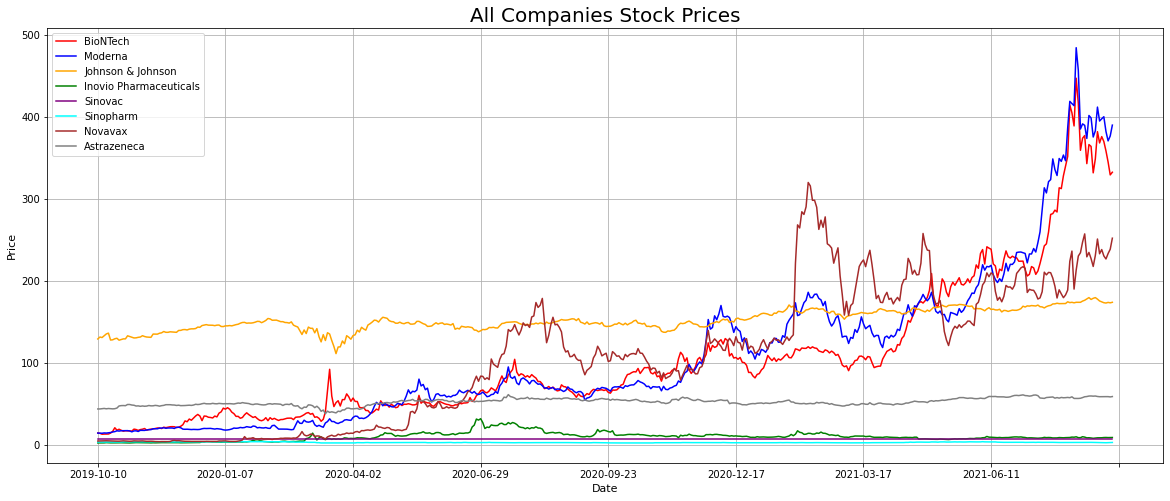

In [16]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(df_biontech['Date'], df_biontech['Close'].astype(np.half), color='Red')
ax.plot(df_moderna['Date'], df_moderna['Close'].astype(np.half), color='blue')
ax.plot(df_jj['Date'], df_jj['Close'].astype(np.half), color='orange')
ax.plot(df_ip['Date'], df_ip['Close'].astype(np.half), color='green')
ax.plot(df_sinovac['Date'], df_sinovac['Close'].astype(np.half), color='purple')
ax.plot(df_sinopharm['Date'], df_sinopharm['Close'].astype(np.half), color='cyan')
ax.plot(df_novavax['Date'], df_novavax['Close'].astype(np.half), color='brown')
ax.plot(df_astra['Date'], df_astra['Close'].astype(np.half), color='gray')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Price', fontsize='11')
plt.legend(['BioNTech', 'Moderna', 'Johnson & Johnson', 'Inovio Pharmaceuticals', 'Sinovac', 'Sinopharm', 'Novavax', 'Astrazeneca'])
plt.title('All Companies Stock Prices', fontsize='20')
plt.grid()
plt.show()

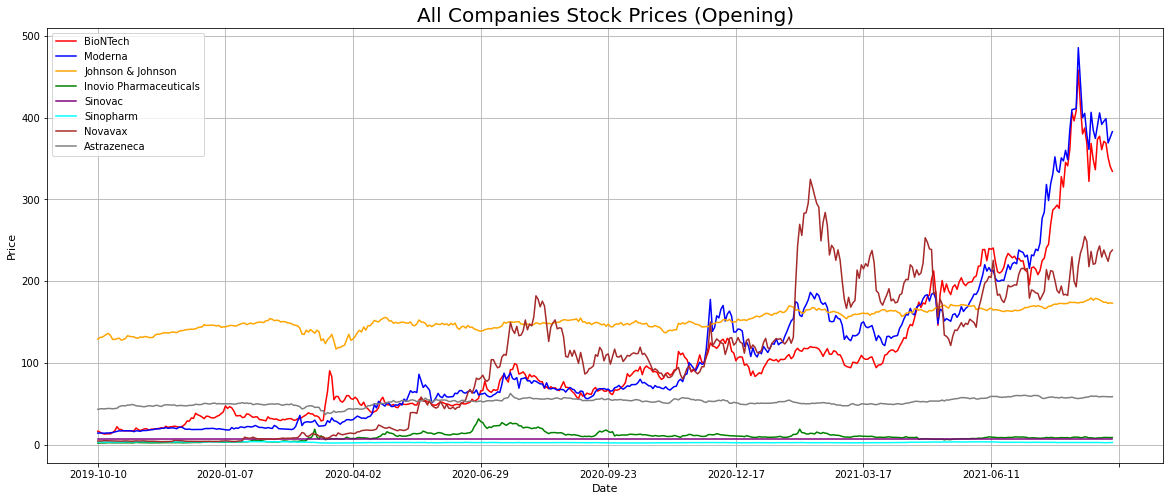

In [17]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(df_biontech['Date'], df_biontech['Open'].astype(np.half), color='Red')
ax.plot(df_moderna['Date'], df_moderna['Open'].astype(np.half), color='blue')
ax.plot(df_jj['Date'], df_jj['Open'].astype(np.half), color='orange')
ax.plot(df_ip['Date'], df_ip['Open'].astype(np.half), color='green')
ax.plot(df_sinovac['Date'], df_sinovac['Open'].astype(np.half), color='purple')
ax.plot(df_sinopharm['Date'], df_sinopharm['Open'].astype(np.half), color='cyan')
ax.plot(df_novavax['Date'], df_novavax['Open'].astype(np.half), color='brown')
ax.plot(df_astra['Date'], df_astra['Open'].astype(np.half), color='gray')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Price', fontsize='11')
plt.legend(['BioNTech', 'Moderna', 'Johnson & Johnson', 'Inovio Pharmaceuticals', 'Sinovac', 'Sinopharm', 'Novavax', 'Astrazeneca'])
plt.title('All Companies Stock Prices (Opening)', fontsize='20')
plt.grid()
plt.show()

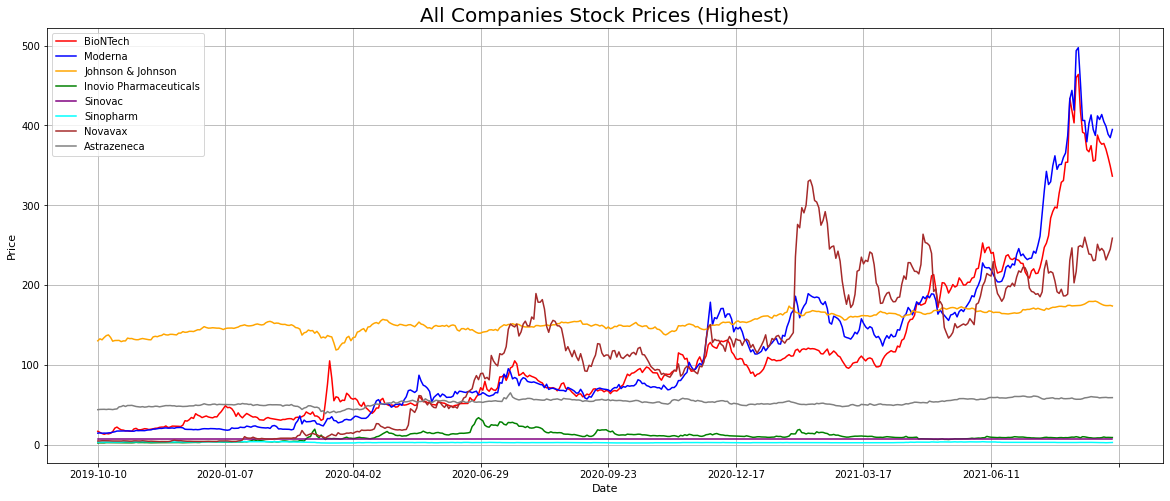

In [18]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(df_biontech['Date'], df_biontech['High'].astype(np.half), color='Red')
ax.plot(df_moderna['Date'], df_moderna['High'].astype(np.half), color='blue')
ax.plot(df_jj['Date'], df_jj['High'].astype(np.half), color='orange')
ax.plot(df_ip['Date'], df_ip['High'].astype(np.half), color='green')
ax.plot(df_sinovac['Date'], df_sinovac['High'].astype(np.half), color='purple')
ax.plot(df_sinopharm['Date'], df_sinopharm['High'].astype(np.half), color='cyan')
ax.plot(df_novavax['Date'], df_novavax['High'].astype(np.half), color='brown')
ax.plot(df_astra['Date'], df_astra['High'].astype(np.half), color='gray')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Price', fontsize='11')
plt.legend(['BioNTech', 'Moderna', 'Johnson & Johnson', 'Inovio Pharmaceuticals', 'Sinovac', 'Sinopharm', 'Novavax', 'Astrazeneca'])
plt.title('All Companies Stock Prices (Highest)', fontsize='20')
plt.grid()
plt.show()

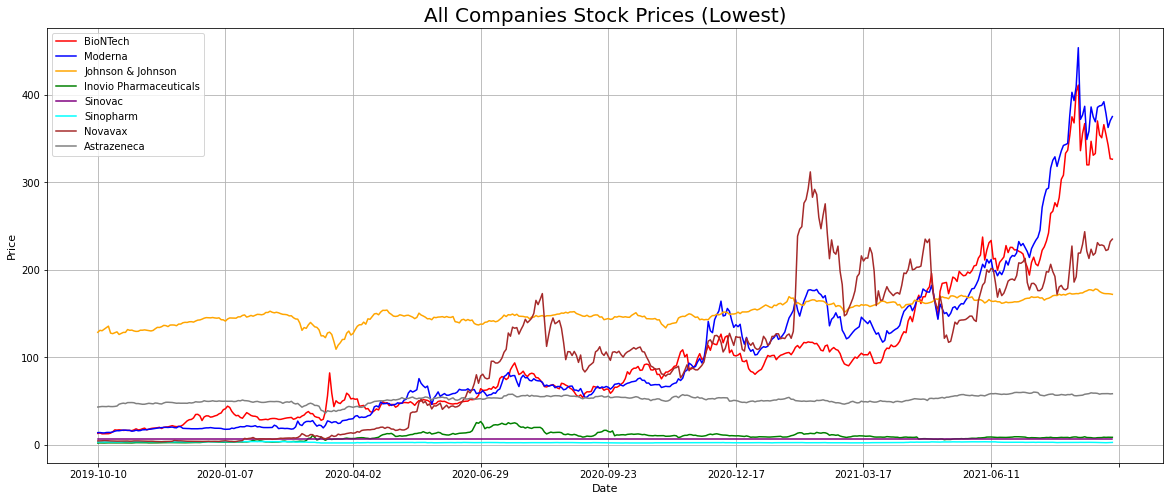

In [19]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(df_biontech['Date'], df_biontech['Low'].astype(np.half), color='Red')
ax.plot(df_moderna['Date'], df_moderna['Low'].astype(np.half), color='blue')
ax.plot(df_jj['Date'], df_jj['Low'].astype(np.half), color='orange')
ax.plot(df_ip['Date'], df_ip['Low'].astype(np.half), color='green')
ax.plot(df_sinovac['Date'], df_sinovac['Low'].astype(np.half), color='purple')
ax.plot(df_sinopharm['Date'], df_sinopharm['Low'].astype(np.half), color='cyan')
ax.plot(df_novavax['Date'], df_novavax['Low'].astype(np.half), color='brown')
ax.plot(df_astra['Date'], df_astra['Low'].astype(np.half), color='gray')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Price', fontsize='11')
plt.legend(['BioNTech', 'Moderna', 'Johnson & Johnson', 'Inovio Pharmaceuticals', 'Sinovac', 'Sinopharm', 'Novavax', 'Astrazeneca'])
plt.title('All Companies Stock Prices (Lowest)', fontsize='20')
plt.grid()
plt.show()

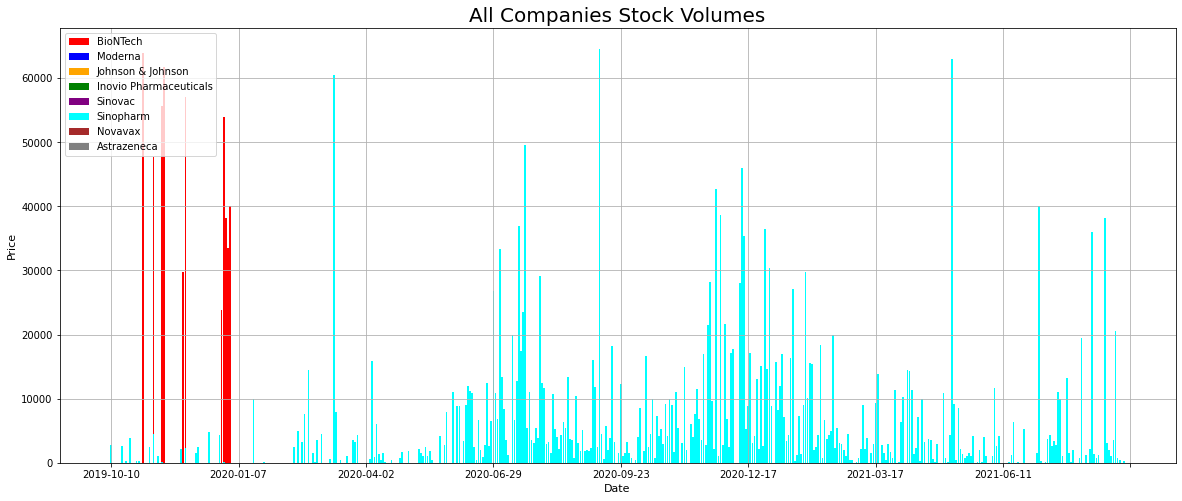

In [20]:
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(df_biontech['Date'], df_biontech['Volume'].astype(np.half), color='Red')
ax.bar(df_moderna['Date'], df_moderna['Volume'].astype(np.half), color='blue')
ax.bar(df_jj['Date'], df_jj['Volume'].astype(np.half), color='orange')
ax.bar(df_ip['Date'], df_ip['Volume'].astype(np.half), color='green')
ax.bar(df_sinovac['Date'], df_sinovac['Volume'].astype(np.half), color='purple')
ax.bar(df_sinopharm['Date'], df_sinopharm['Volume'].astype(np.half), color='cyan')
ax.bar(df_novavax['Date'], df_novavax['Volume'].astype(np.half), color='brown')
ax.bar(df_astra['Date'], df_astra['Volume'].astype(np.half), color='gray')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Price', fontsize='11')
plt.legend(['BioNTech', 'Moderna', 'Johnson & Johnson', 'Inovio Pharmaceuticals', 'Sinovac', 'Sinopharm', 'Novavax', 'Astrazeneca'])
plt.title('All Companies Stock Volumes', fontsize='20')
plt.grid()
plt.show()

### Volatility

In [21]:
df_biontech['vol'] = (df_biontech['Close'].astype(np.half)/df_biontech['Close'].astype(np.half).shift(1)) - 1
df_moderna['vol'] = (df_moderna['Close'].astype(np.half)/df_moderna['Close'].astype(np.half).shift(1)) - 1
df_jj['vol'] = (df_jj['Close'].astype(np.half)/df_jj['Close'].astype(np.half).shift(1)) - 1
df_ip['vol'] = (df_ip['Close'].astype(np.half)/df_ip['Close'].astype(np.half).shift(1)) - 1
df_sinovac['vol'] = (df_sinovac['Close'].astype(np.half)/df_sinovac['Close'].astype(np.half).shift(1)) - 1
df_sinopharm['vol'] = (df_sinopharm['Close'].astype(np.half)/df_sinopharm['Close'].astype(np.half).shift(1)) - 1
df_novavax['vol'] = (df_novavax['Close'].astype(np.half)/df_novavax['Close'].astype(np.half).shift(1)) - 1
df_astra['vol'] = (df_astra['Close'].astype(np.half)/df_astra['Close'].astype(np.half).shift(1)) - 1

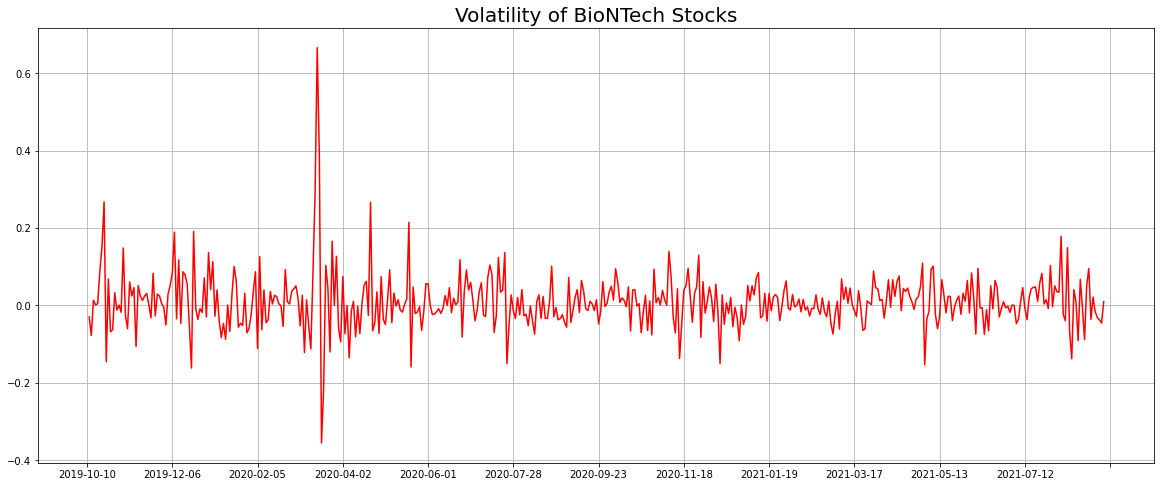

In [22]:
#BionTech
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(df_biontech['Date'], df_biontech['vol'], color='red')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
plt.title('Volatility of BioNTech Stocks', fontsize='20')
plt.grid()
plt.show()

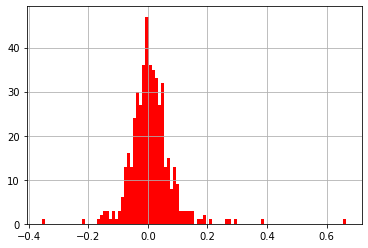

In [23]:
df_biontech['vol'].hist(bins=100, color='red');

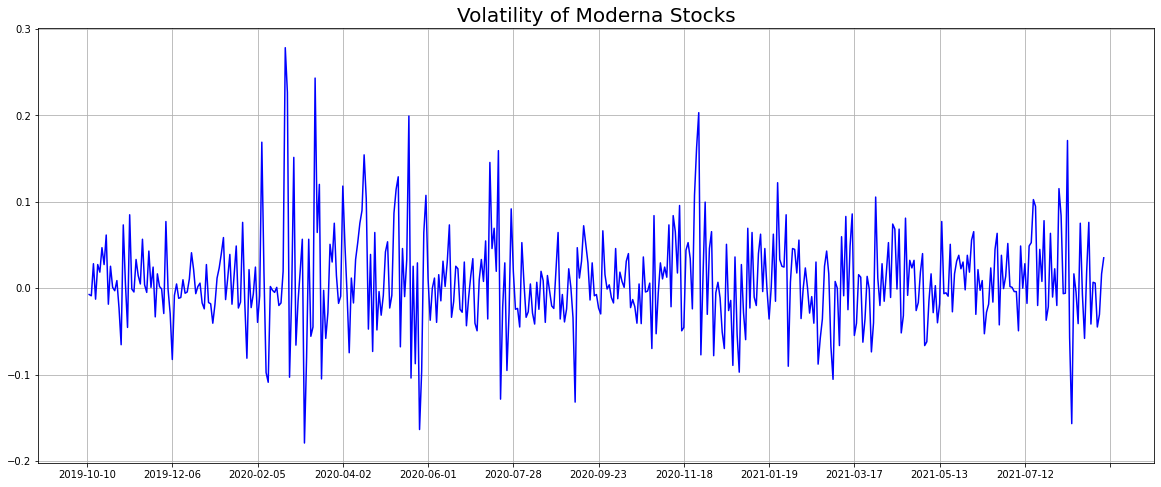

In [24]:
#Moderna
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(df_moderna['Date'], df_moderna['vol'], color='blue')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
plt.title('Volatility of Moderna Stocks', fontsize='20')
plt.grid()
plt.show()

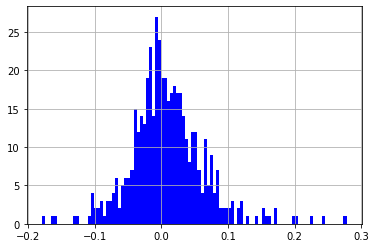

In [25]:
df_moderna['vol'].hist(bins=100, color='blue');

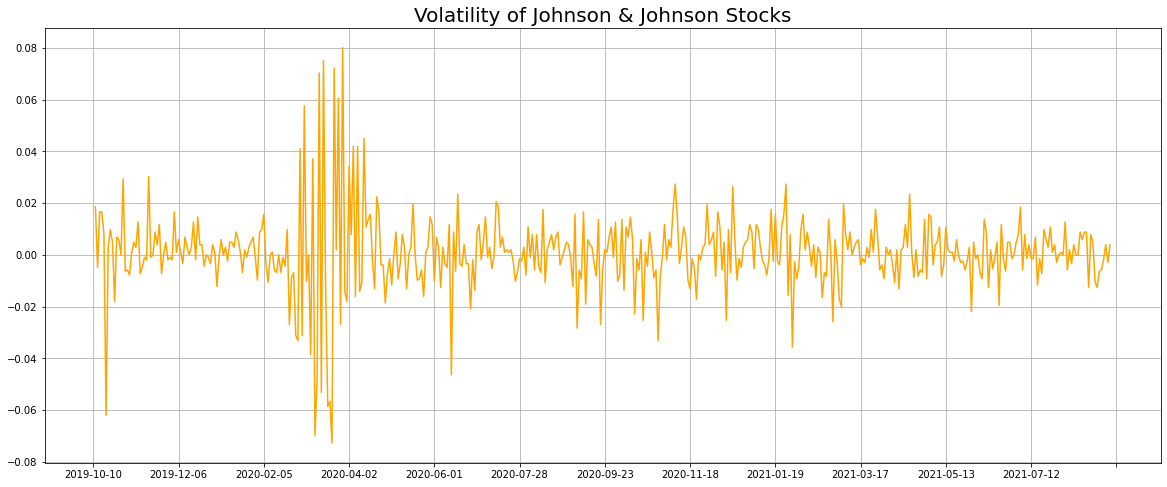

In [26]:
#Johnson & Johnson
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(df_jj['Date'], df_jj['vol'], color='orange')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
plt.title('Volatility of Johnson & Johnson Stocks', fontsize='20')
plt.grid()
plt.show()

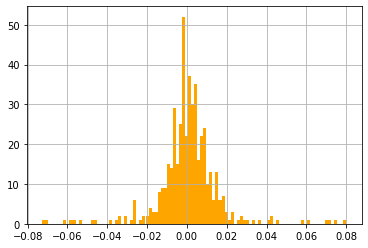

In [27]:
df_jj['vol'].hist(bins=100, color='orange');

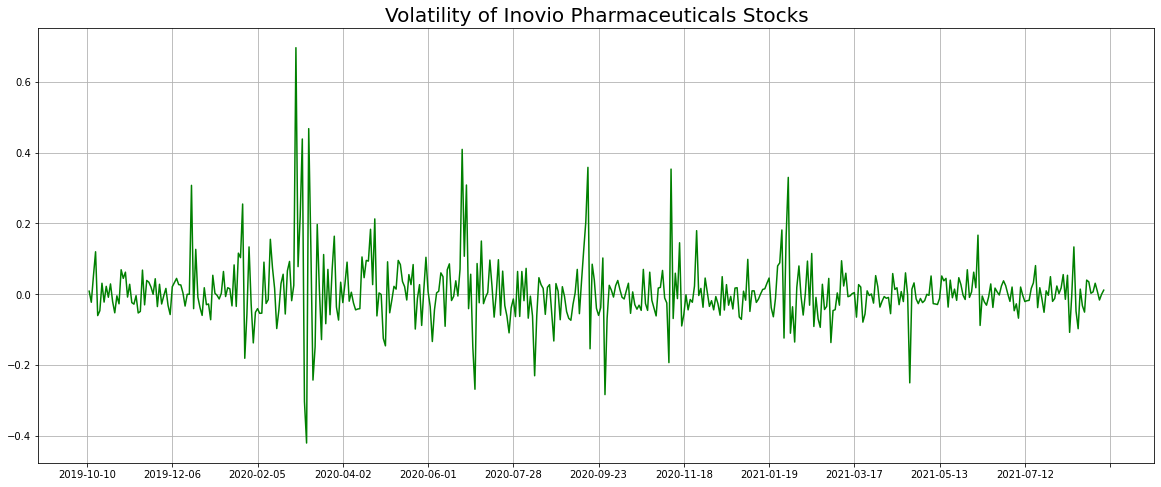

In [29]:
#Inovio Pharmaceuticals
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(df_ip['Date'], df_ip['vol'], color='green')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
plt.title('Volatility of Inovio Pharmaceuticals Stocks', fontsize='20')
plt.grid()
plt.show()

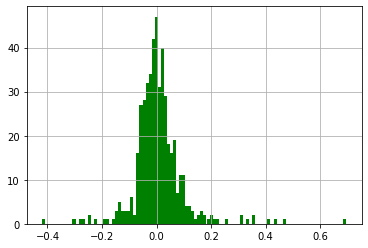

In [30]:
df_ip['vol'].hist(bins=100, color='green');

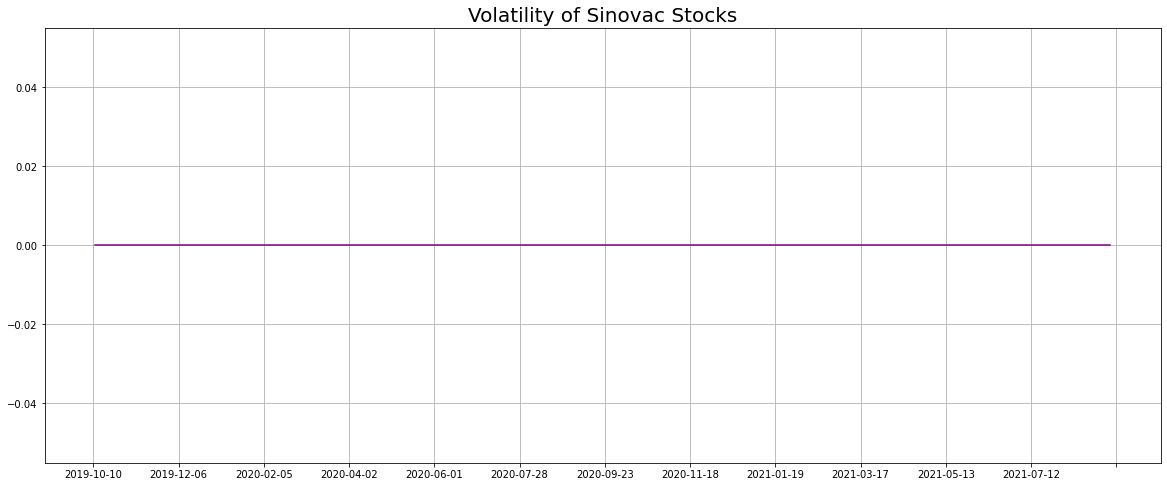

In [31]:
#Sinovac
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(df_sinovac['Date'], df_sinovac['vol'], color='purple')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
plt.title('Volatility of Sinovac Stocks', fontsize='20')
plt.grid()
plt.show()

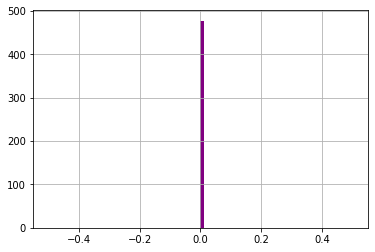

In [32]:
df_sinovac['vol'].hist(bins=100, color='purple');

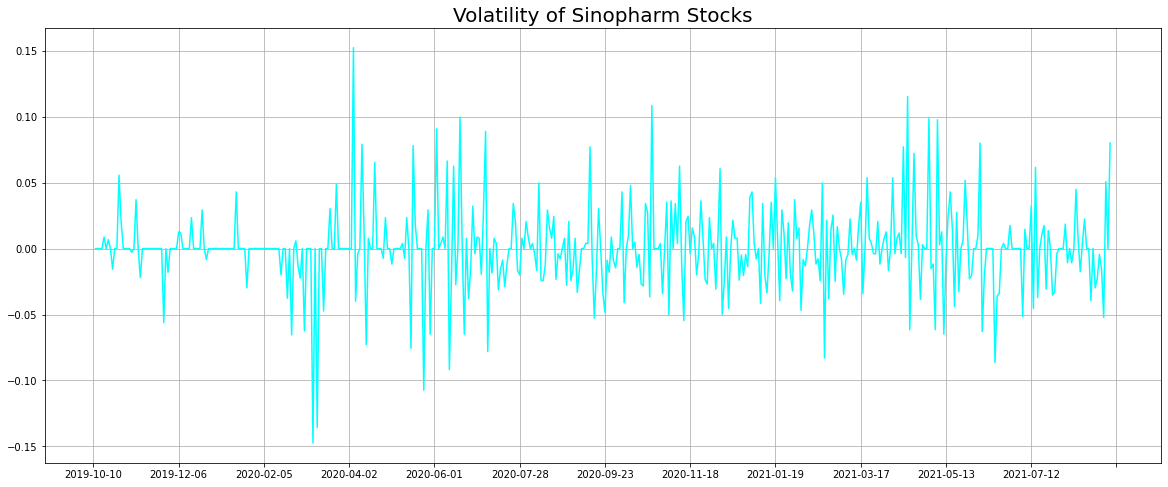

In [33]:
#Sinopharm
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(df_sinopharm['Date'], df_sinopharm['vol'], color='cyan')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
plt.title('Volatility of Sinopharm Stocks', fontsize='20')
plt.grid()
plt.show()

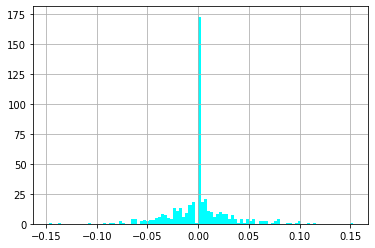

In [34]:
df_sinopharm['vol'].hist(bins=100, color='cyan');

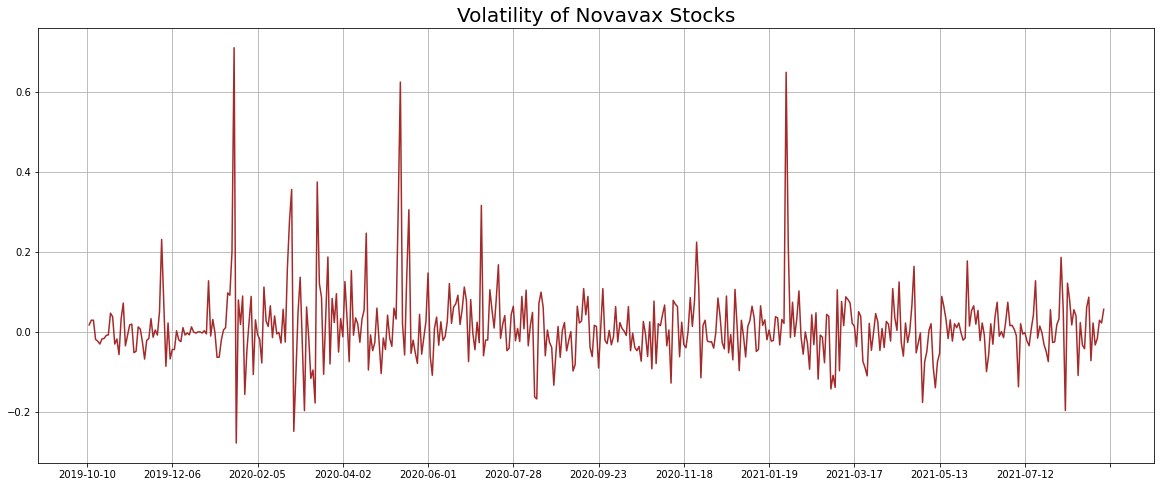

In [35]:
#Novavax
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(df_novavax['Date'], df_novavax['vol'], color='brown')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
plt.title('Volatility of Novavax Stocks', fontsize='20')
plt.grid()
plt.show()

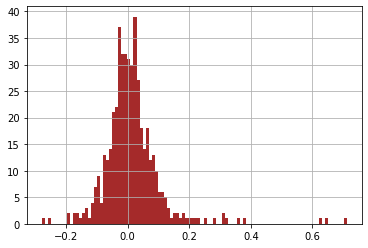

In [36]:
df_novavax['vol'].hist(bins=100, color='brown');

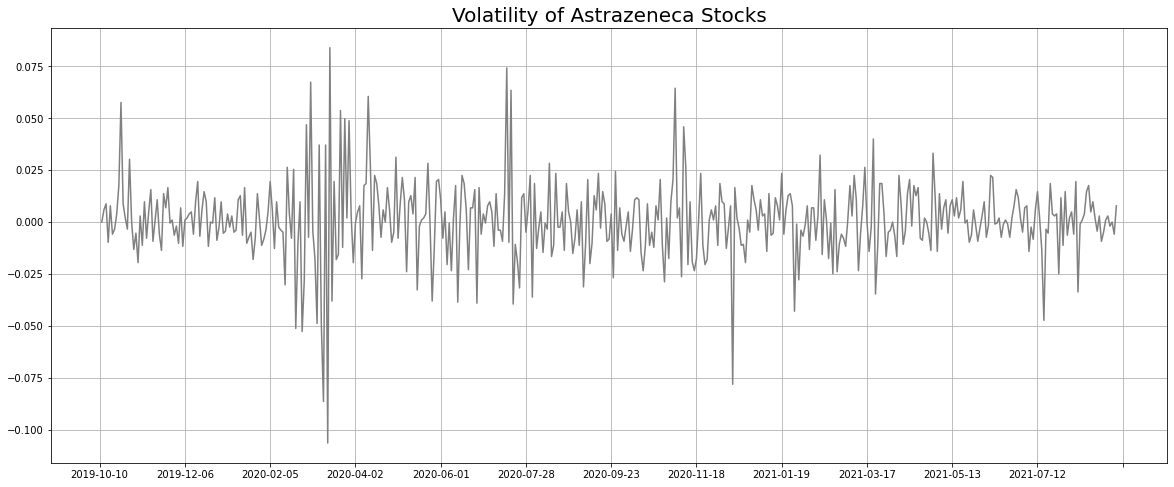

In [37]:
#Astrazeneca
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(df_astra['Date'], df_astra['vol'], color='gray')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
plt.title('Volatility of Astrazeneca Stocks', fontsize='20')
plt.grid()
plt.show()

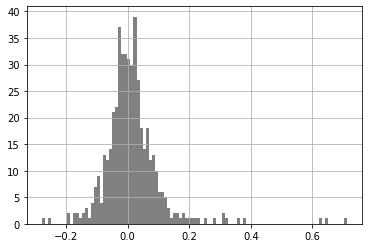

In [38]:
df_novavax['vol'].hist(bins=100, color='gray');


### Cumulative Return

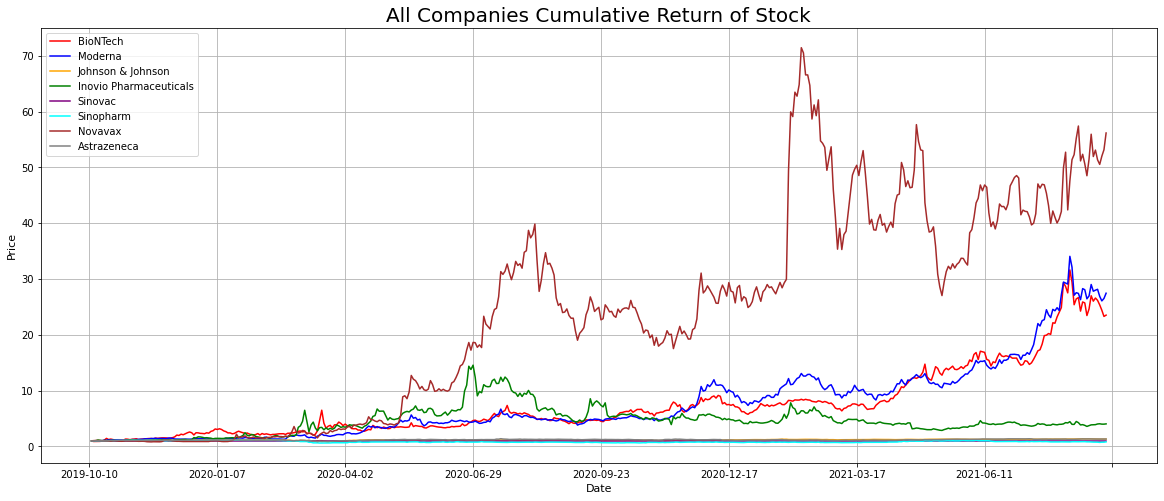

In [39]:
df_biontech['Cumulative Return'] = (1 + df_biontech['vol']).cumprod()
df_moderna['Cumulative Return'] = (1 + df_moderna['vol']).cumprod()
df_jj['Cumulative Return'] = (1 + df_jj['vol']).cumprod()
df_ip['Cumulative Return'] = (1 + df_ip['vol']).cumprod()
df_sinovac['Cumulative Return'] = (1 + df_sinovac['vol']).cumprod()
df_sinopharm['Cumulative Return'] = (1 + df_sinopharm['vol']).cumprod()
df_novavax['Cumulative Return'] = (1 + df_novavax['vol']).cumprod()
df_astra['Cumulative Return'] = (1 + df_astra['vol']).cumprod()
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(df_biontech['Date'], df_biontech['Cumulative Return'], color='Red')
ax.plot(df_moderna['Date'], df_moderna['Cumulative Return'], color='blue')
ax.plot(df_jj['Date'], df_jj['Cumulative Return'], color='orange')
ax.plot(df_ip['Date'], df_ip['Cumulative Return'], color='green')
ax.plot(df_sinovac['Date'], df_sinovac['Cumulative Return'], color='purple')
ax.plot(df_sinopharm['Date'], df_sinopharm['Cumulative Return'], color='cyan')
ax.plot(df_novavax['Date'], df_novavax['Cumulative Return'], color='brown')
ax.plot(df_astra['Date'], df_astra['Cumulative Return'], color='gray')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Price', fontsize='11')
plt.legend(['BioNTech', 'Moderna', 'Johnson & Johnson', 'Inovio Pharmaceuticals', 'Sinovac', 'Sinopharm', 'Novavax', 'Astrazeneca'])
plt.title('All Companies Cumulative Return of Stock', fontsize='20')
plt.grid()
plt.show()